In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import string

In [3]:
results_dir = "/home/s2208943/ipdis/results/final_results_data/results/"

In [183]:
folders = os.listdir(results_dir)

In [184]:
folders

['evid_sensoyx5kl1',
 'ssn_mcdrop05',
 'ssn_ind_mu02_DOMAIN_CHANGE',
 'punet_muonly10_DOMAIN_CHANGE',
 'ssn_ind_mu01_DOMAIN_CHANGE',
 'evid_region01',
 'evid_sensoy5',
 'ssn_ind_mu02',
 'ssn_ens_DOMAIN_CHANGE',
 'ssn_mcdrop05_DOMAIN_CHANGE',
 'punet_muonly20',
 'punet_muonly50',
 'ssn_DOMAIN_CHANGE',
 'punet_muonlyboth20',
 'punet20_DOMAIN_CHANGE',
 'ssn_ens_muonly',
 'ssn_mcdrop02',
 'evid_sensoy5_DOMAIN_CHANGE',
 'punet_muonly10',
 'punet_muonlyboth5',
 'punet_muonlyboth10',
 'punet_muonlyboth50',
 'punet5_DOMAIN_CHANGE',
 'evid_sensoyx1kl1',
 'evid_region005',
 'ssn_ind02',
 'evid_region01_DOMAIN_CHANGE',
 'evid_sensoyx1kl1_DOMAIN_CHANGE',
 'evid_region005_DOMAIN_CHANGE',
 'evid_sensoyx5kl1_DOMAIN_CHANGE',
 'ssn_mcdrop01_DOMAIN_CHANGE',
 'ssn_muonly',
 'ensemble',
 'ensemble_DOMAIN_CHANGE',
 'punet_muonlyboth50_DOMAIN_CHANGE',
 'punet10',
 'punet5',
 'punet10_DOMAIN_CHANGE',
 'punet_muonly5',
 'ssn_mcdrop01',
 'ssn_ens',
 'punet_muonly5_DOMAIN_CHANGE',
 'ssn_ind02_DOMAIN_CHANGE',
 '

### extracting results to a dataframe

In [185]:
os.listdir(results_dir + folders[0])

['images',
 'sample_diversity_plot.png',
 'text_results.txt',
 'calibration.png',
 'pavpu.png',
 'types_violin.png',
 'UEO.png',
 'tps.png',
 'fps.png',
 'fns.png']

In [186]:
with open(results_dir + folders[0] + "/text_results.txt") as f:
    column_names = ["method"]
    column_locations = [0]
    lines = f.readlines()
    
    for i, line in enumerate(lines[1:]): # title is on the first lien
        if line == '\n':
            continue
        else:
            line = line[:-1]
            if line[0].isalpha():
                column_names.append(line)
                column_locations.append(i+1)

In [187]:
with open(results_dir + folders[0] + "/text_results.txt") as file:
        filelength = len(file.readlines())

In [188]:
filelength

112

In [189]:
columns = {c:[] for c in column_names}
for f in folders:
    with open(results_dir + f + "/text_results.txt") as file:
        lines = file.readlines()
        if len(lines) != filelength:
            continue # partial or failed evaluation runs
        columns['method'].append(f)
        for j, cn in enumerate(column_names[1:]):
            line = lines[column_locations[j+1]+1]
            line = line[:-1] # remove the \n at the end
            
            # convert to numbers
            if line != '':
                if line[0] != '[':
                    line = float(line)
                # else:
                #     line = list(line)
            
            columns[cn].append(line)

In [190]:
df = pd.DataFrame(columns)

### generating plots

# todo:
- [x] picking the techniques that I will benchmark
- [x] plot of basic metrics as box and whisker
- [x] plot of calibration per technique
- [ ] predict best threshold using pavpu and using UEO
- [ ] plot of TP, FN FP for each technique with best thresholds predicted
- [ ] plot of UEO per model
- [ ] plot of the mean coverage etc for each tau and highlight the best tau according to UEO and pavpu for both.
- [ ] nice table that covers all the metrics (GED, VCC, ECE all in one table
- [ ] comparsion of what happens if you have mu only vs mu on both for P-Unet and SSN ensemble.
- [ ] then get all the plots and tables for the out of domain data.

In [191]:
df[['method', 'mean dice']].loc[~df['method'].str.contains("DOMAIN")]

,method,mean dice
0,evid_sensoyx5kl1,0.668511
1,ssn_mcdrop05,0.688791
4,evid_region01,0.682929
5,evid_sensoy5,0.662993
6,ssn_ind_mu02,0.677782
9,punet_muonly20,0.686091
10,punet_muonly50,0.681611
12,punet_muonlyboth20,0.687766
14,ssn_ens_muonly,0.697429
15,ssn_mcdrop02,0.679159


In [231]:
methods_map = {
    #"ssn":"SSN\ndice all",
    "ssn_muonly":"SSN",
    "ssn_ens": "Ensemble SSN\ndice all",
    "ssn_ens_muonly": "Ensemble SSN",
    "ssn_ind_mu01":"Ind",
    #"ssn_ind02":"Ind\n dice all",
    "evid_region01":"Evidential\nDice",
    #"evid_sensoy5":"Evidential\nXent",
    "ensemble":"Ensemble",
    "ssn_mcdrop01":"MC Dropout\n(p=0.1)",
    #"ssn_mcdrop02":"MC Dropout\n(p=0.2)",
    "ssn_mcdrop05":"MC Dropout\n(p=0.5)",
    #"punet10":"P-UNet 10\ndice all",
    "punet_muonly10":"P-UNet 10",
    #"punet_muonly20":"P-UNet 20",
}

In [232]:
# select methods
dfm = df.loc[df["method"].isin(methods_map.keys())]
dfm = dfm.set_index('method')
dfa = df.set_index('method')

In [233]:
# check all selected methods have been found
len(methods_map), len(dfm)

(9, 9)

In [234]:
#fm

### Metrics Overview

In [235]:
def extract_list(ll):
    ll = ll[1:-1] # remove brackets
    elems = ll.split(", ")
    return [float(e) for e in elems]
    

In [236]:
# extract a dataframe of each metric
dfs = []
for method in methods_map.keys():
    dice = extract_list(dfm.loc[method]['dice'])
    hd95 = extract_list(dfm.loc[method]['hd95'])
    avd = extract_list(dfm.loc[method]['avd'])
    f1 = extract_list(dfm.loc[method]['f1'])
    recall = extract_list(dfm.loc[method]['recall'])
    l = len(dice)
    
    data = {}
    abrv_name = methods_map[method]
    data["method"] = np.array([abrv_name for i in range(l)])
    data["dice"] = dice
    data["hd95"] = hd95
    data["avd"] = avd
    data["f1"] = f1
    data["recall"] = recall
    
    
    
    dfi = pd.DataFrame(data)
    dfs.append(dfi)
    # break

In [237]:
metrics_df = pd.concat(dfs)

In [238]:
plt.style.use('fivethirtyeight')
sns.set_palette(sns.color_palette("pastel"))
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

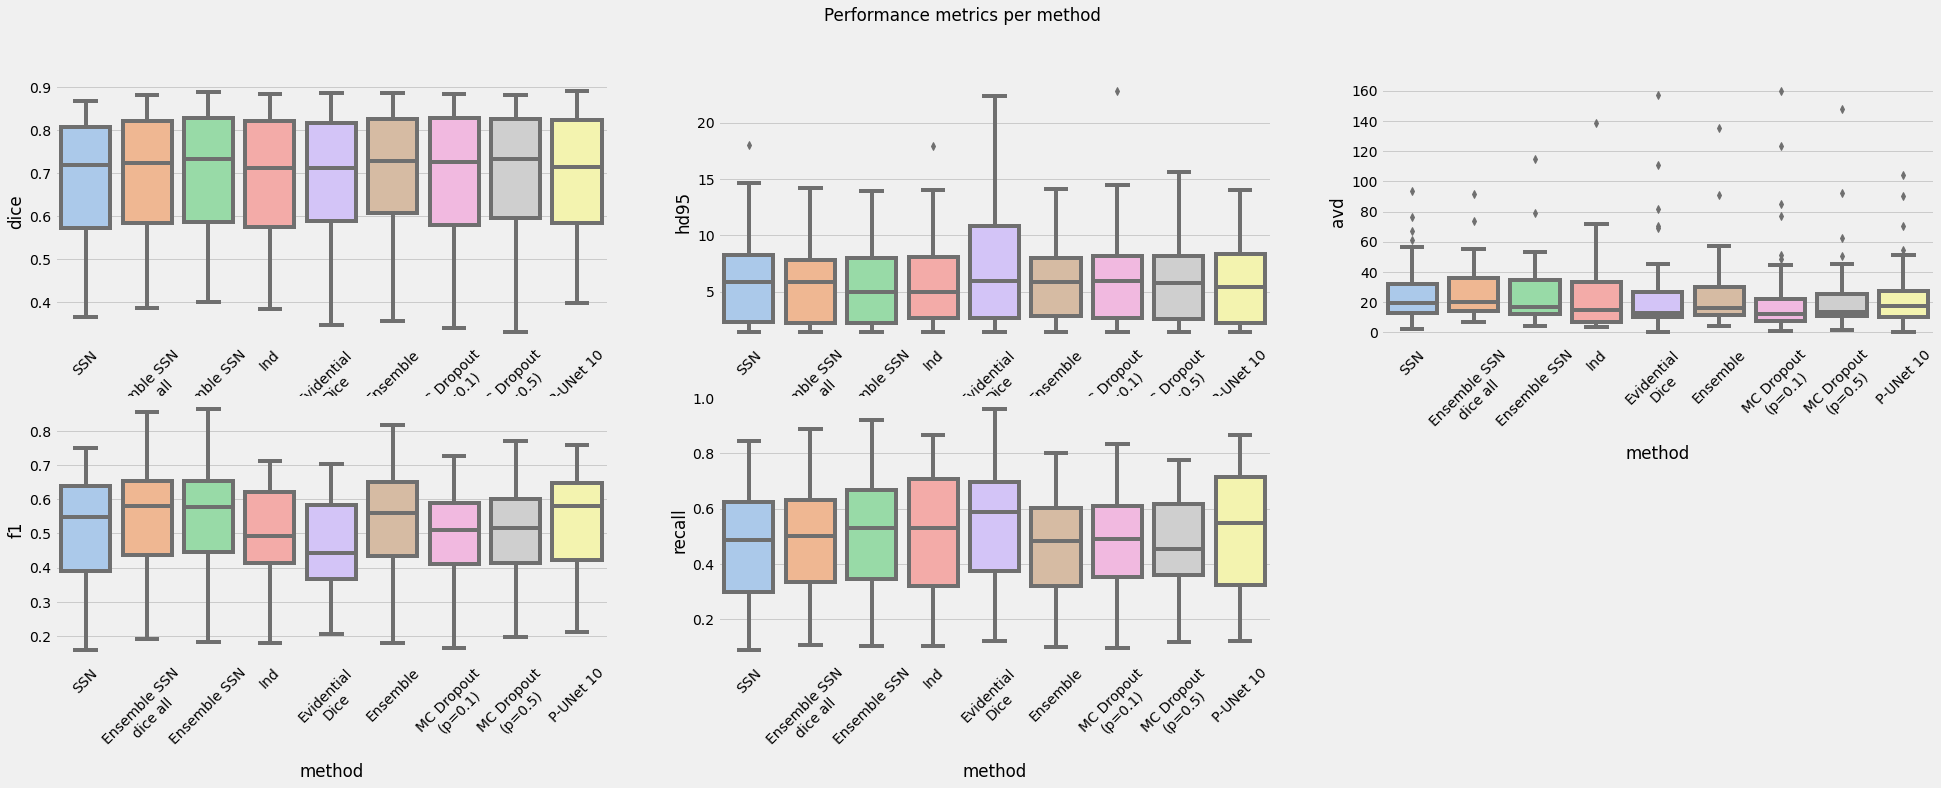

In [239]:

plt.figure(figsize=(30,10))
metrics = ['dice', 'hd95', 'avd', 'f1', 'recall']

for i, metric in enumerate(metrics):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=metrics_df, x="method", y=metric)
    plt.xticks(rotation = 45);
    
plt.suptitle("Performance metrics per method");

# save_result_plot("metrics_in_domain_deterministic")

### Calibration of each method

In [240]:
dfm.keys()

Index(['dice', 'hd95', 'avd', 'recall', 'f1', 'mean AVD', 'mean dice',
       'best_dice_mean', 'check: len samples', 'calibration curve data: ',
       'bin_accuracies: ', 'bin_confidences: ', 'EXPECTED CALIBRATION ERROR',
       'sample diversity', 'generalized energy distance:', 'p_acs:', 'p_aus:',
       'pavpu:', 'vvc correlation coefficient:', 'tp, fp, fn totals',
       'TP mean', 'FP mean', 'FN mean', 'TP ent values', 'FP ent values',
       'FN ent values', 'uncertainty thresholds',
       'mean coverage of areas missed by mean as tau increases',
       'mean size of entirely missed lesions',
       'mean coverage of lesions entirely missed by the mean segmentation',
       'total number of missing lesions',
       'proportion of lesions entirely missed', 'num lesions:', 'sUEO',
       'best tau for max UEO', 'max UEO', 'UEO per tau', 'tau AUC'],
      dtype='object')

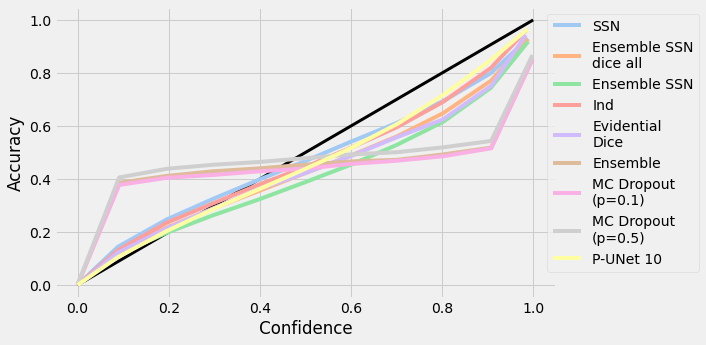

In [241]:
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in methods_map.keys():
    bin_accs = extract_list(dfm.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfm.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=methods_map[method])

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

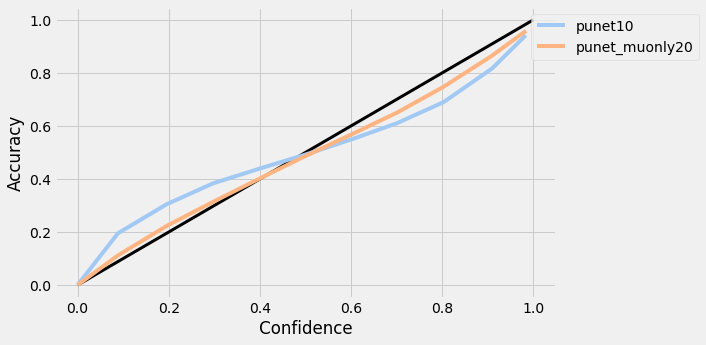

In [242]:
# comparison of punet dice all and no dice all
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ["punet10", "punet_muonly20"]:
    bin_accs = extract_list(dfa.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfa.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=method)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

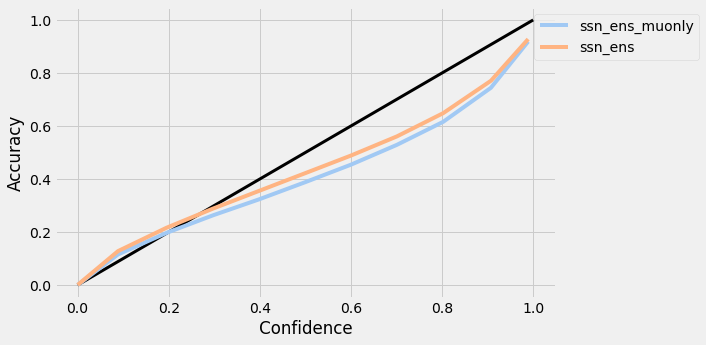

In [243]:
# comparison of punet dice all and no dice all
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ["ssn_ens_muonly", "ssn_ens"]:
    bin_accs = extract_list(dfa.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfa.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=method)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

### Plot UEO per method

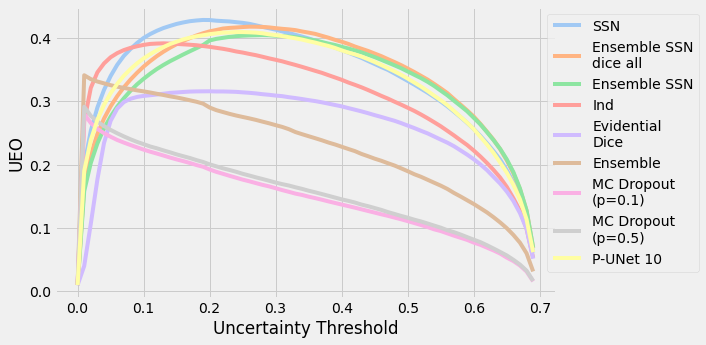

In [244]:
plt.figure(figsize=(8,5))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    ueos = bin_acc = extract_list(dfm.loc[method]['UEO per tau'])
    plt.plot(taus, ueos, linewidth=4, label=methods_map[method])

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Uncertainty Threshold")
plt.ylabel("UEO");

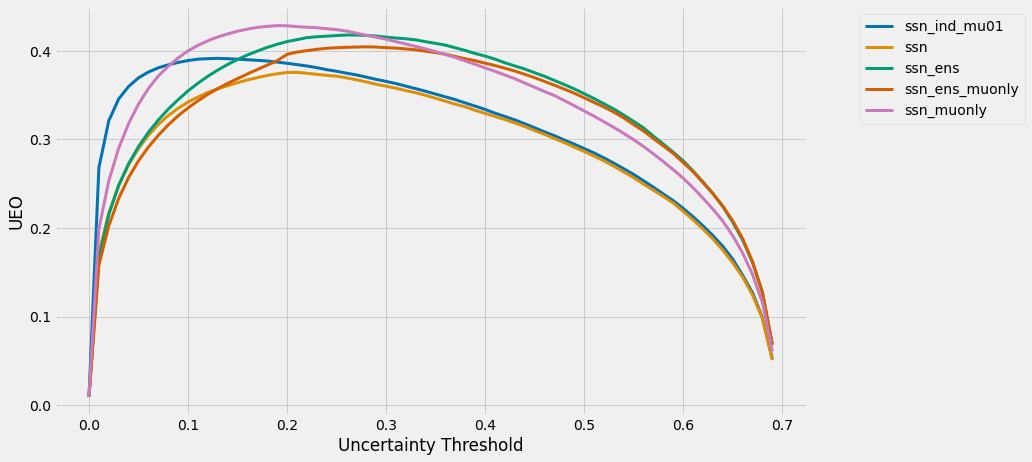

In [245]:
sns.set_palette(sns.color_palette("colorblind"))
plt.figure(figsize=(12,7))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ['ssn_ind_mu01', 'ssn', 'ssn_ens', 'ssn_ens_muonly', 'ssn_muonly']:
    taus = extract_list(dfa.loc[method]['uncertainty thresholds'])
    ueos = bin_acc = extract_list(dfa.loc[method]['UEO per tau'])
    plt.plot(taus, ueos, linewidth=3, label=method)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Uncertainty Threshold")
plt.ylabel("UEO");

In [246]:
folders

['evid_sensoyx5kl1',
 'ssn_mcdrop05',
 'ssn_ind_mu02_DOMAIN_CHANGE',
 'punet_muonly10_DOMAIN_CHANGE',
 'ssn_ind_mu01_DOMAIN_CHANGE',
 'evid_region01',
 'evid_sensoy5',
 'ssn_ind_mu02',
 'ssn_ens_DOMAIN_CHANGE',
 'ssn_mcdrop05_DOMAIN_CHANGE',
 'punet_muonly20',
 'punet_muonly50',
 'ssn_DOMAIN_CHANGE',
 'punet_muonlyboth20',
 'punet20_DOMAIN_CHANGE',
 'ssn_ens_muonly',
 'ssn_mcdrop02',
 'evid_sensoy5_DOMAIN_CHANGE',
 'punet_muonly10',
 'punet_muonlyboth5',
 'punet_muonlyboth10',
 'punet_muonlyboth50',
 'punet5_DOMAIN_CHANGE',
 'evid_sensoyx1kl1',
 'evid_region005',
 'ssn_ind02',
 'evid_region01_DOMAIN_CHANGE',
 'evid_sensoyx1kl1_DOMAIN_CHANGE',
 'evid_region005_DOMAIN_CHANGE',
 'evid_sensoyx5kl1_DOMAIN_CHANGE',
 'ssn_mcdrop01_DOMAIN_CHANGE',
 'ssn_muonly',
 'ensemble',
 'ensemble_DOMAIN_CHANGE',
 'punet_muonlyboth50_DOMAIN_CHANGE',
 'punet10',
 'punet5',
 'punet10_DOMAIN_CHANGE',
 'punet_muonly5',
 'ssn_mcdrop01',
 'ssn_ens',
 'punet_muonly5_DOMAIN_CHANGE',
 'ssn_ind02_DOMAIN_CHANGE',
 '

### Plot pavpu metrics per method

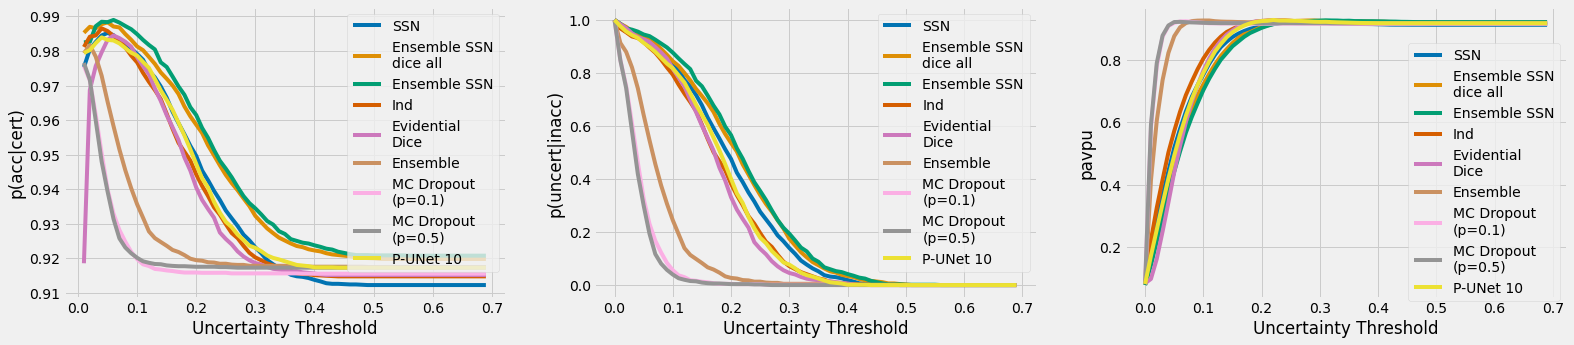

In [247]:
plt.figure(figsize=(24,5))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

plt.subplot(1,3,1)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['p_acs:'])
    plt.plot(taus, metric, linewidth=4, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("p(acc|cert)");
    
plt.subplot(1,3,2)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['p_aus:'])
    plt.plot(taus, metric, linewidth=4, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("p(uncert|inacc)");
    
plt.subplot(1,3,3)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['pavpu:'])
    plt.plot(taus, metric, linewidth=4, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("pavpu");



### compute best tau on patch metrics

### plot small lesion detection metrics

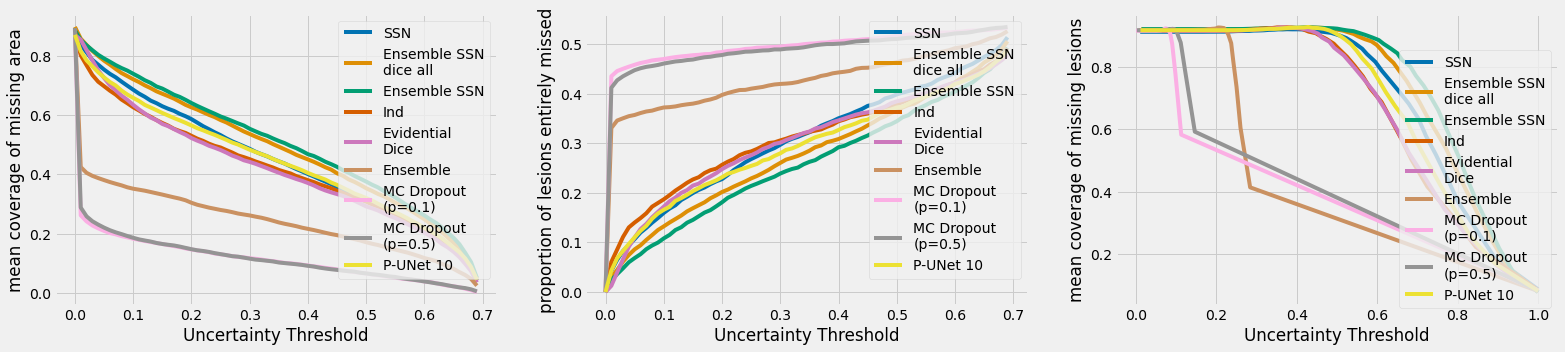

In [248]:
plt.figure(figsize=(24,5))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

plt.subplot(1,3,1)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['mean coverage of areas missed by mean as tau increases'])
    plt.plot(taus, metric, linewidth=4, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("mean coverage of missing area");
    
plt.subplot(1,3,2)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['proportion of lesions entirely missed'])
    plt.plot(taus, metric, linewidth=4, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("proportion of lesions entirely missed");
    
plt.subplot(1,3,3)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['mean coverage of lesions entirely missed by the mean segmentation'])
    metric = bin_acc = extract_list(dfm.loc[method]['pavpu:'])
    plt.plot(taus, metric, linewidth=4, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("mean coverage of missing lesions");

In [249]:
### table of useful information
# - record sUEO, sample diveristy, GED, ece, capture of missing lesions at best tau (but I need to check if calibration actually helps before I do that....

In [250]:
dfm['EXPECTED CALIBRATION ERROR']

method
ssn_mcdrop05      0.148762
evid_region01     0.055874
ssn_ens_muonly    0.073903
punet_muonly10    0.033539
ssn_muonly        0.060021
ensemble          0.161099
ssn_mcdrop01      0.160850
ssn_ens           0.065071
ssn_ind_mu01      0.046533
Name: EXPECTED CALIBRATION ERROR, dtype: float64

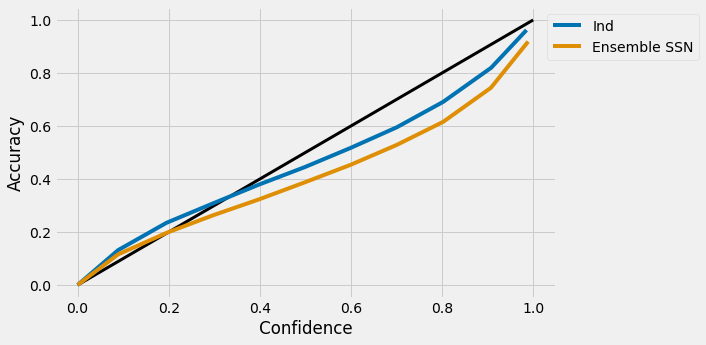

In [251]:
# best pavpu threshold is done by taking the max of each pavpu metric at each point
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ['ssn_ind_mu01', 'ssn_ens_muonly']:
    bin_accs = extract_list(dfm.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfm.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=methods_map[method])

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

In [252]:
dfm['sUEO']

method
ssn_mcdrop05      0.138099
evid_region01     0.333508
ssn_ens_muonly    0.444664
punet_muonly10    0.431719
ssn_muonly        0.451020
ensemble          0.224422
ssn_mcdrop01      0.131832
ssn_ens           0.448833
ssn_ind_mu01      0.389004
Name: sUEO, dtype: float64

In [253]:
dfm.keys()

Index(['dice', 'hd95', 'avd', 'recall', 'f1', 'mean AVD', 'mean dice',
       'best_dice_mean', 'check: len samples', 'calibration curve data: ',
       'bin_accuracies: ', 'bin_confidences: ', 'EXPECTED CALIBRATION ERROR',
       'sample diversity', 'generalized energy distance:', 'p_acs:', 'p_aus:',
       'pavpu:', 'vvc correlation coefficient:', 'tp, fp, fn totals',
       'TP mean', 'FP mean', 'FN mean', 'TP ent values', 'FP ent values',
       'FN ent values', 'uncertainty thresholds',
       'mean coverage of areas missed by mean as tau increases',
       'mean size of entirely missed lesions',
       'mean coverage of lesions entirely missed by the mean segmentation',
       'total number of missing lesions',
       'proportion of lesions entirely missed', 'num lesions:', 'sUEO',
       'best tau for max UEO', 'max UEO', 'UEO per tau', 'tau AUC'],
      dtype='object')

In [254]:
dfm[['sUEO', 'sample diversity', 'generalized energy distance:', 'best tau for max UEO', 'mean dice']]

,sUEO,sample diversity,generalized energy distance:,best tau for max UEO,mean dice
method,,,,,
ssn_mcdrop05,0.138099,0.120937,0.800643,0.01,0.688791
evid_region01,0.333508,0.000000,0.926249,0.20,0.682929
ssn_ens_muonly,0.444664,0.487200,0.538904,0.28,0.697429
punet_muonly10,0.431719,0.121453,0.795886,0.24,0.690673
ssn_muonly,0.451020,0.364822,0.645565,0.19,0.677614
ensemble,0.224422,0.247157,0.683036,0.01,0.695158
ssn_mcdrop01,0.131832,0.122378,0.798155,0.01,0.688685
ssn_ens,0.448833,0.441339,0.570107,0.26,0.693182
ssn_ind_mu01,0.389004,0.016514,0.903780,0.13,0.685826
